In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris

In [2]:
#vegi_df = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegis_traindata.csv")
#vegi_df = vegi_df.drop(columns=["Unnamed: 0", "green pixels", "Image"])
#vegi_df.head()
X, y = load_iris(return_X_y=True)

In [9]:
vegi_encoded_df = vegi_df.copy()

vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte', 'Label'] = 0
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel', 'Label'] = 1
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel', 'Label'] = 2
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte_Trieb', 'Label'] = 3
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel_Trieb', 'Label'] = 4
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel_Trieb', 'Label'] = 5

vegi_encoded_df['Label'] = vegi_encoded_df['Label'].astype('int')
vegi_encoded_df['Label'].value_counts()

Label
1    496
2    445
0    401
3    357
4    245
5    193
Name: count, dtype: int64

In [3]:
#y_train = y_train.to_numpy()
clf_tree = DecisionTreeClassifier(criterion='gini')
clf_tree.fit(X, y)

DecisionTreeClassifier()

In [4]:
clf_tree.get_depth()

5

In [5]:
clf_tree.get_n_leaves()

9

In [10]:
y_train_pred = clf_tree.predict(X)
#y_test_pred = clf_tree.predict(y.reshape(1,-1))

In [11]:
#accuracy_testdata = accuracy_score(y_test, y_test_pred)
accuracy_testdata=-1
accuracy_traindata = accuracy_score(y, y_train_pred)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

#number_correct_testdata = accuracy_score(y_test, y_test_pred, normalize=False)
number_correct_testdata=-1
number_correct_traindata = accuracy_score(y, y_train_pred, normalize=False)
print(f"Number Correct Predicions Test: {number_correct_testdata}\nNumber Correct Predicions Train: {number_correct_traindata}")

Accuracy Test: -1
Accuracy Train: 1.0
Number Correct Predicions Test: -1
Number Correct Predicions Train: 150


In [6]:
text_representation = tree.export_text(clf_tree)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



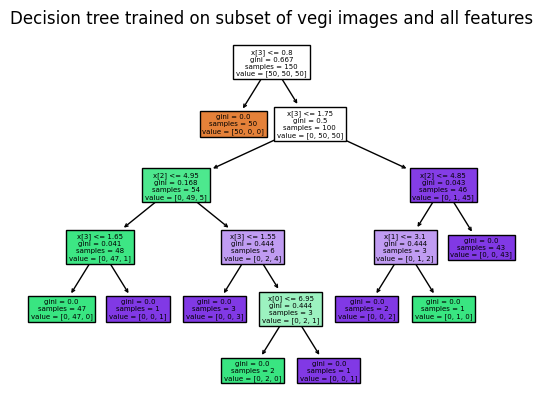

In [12]:
fig = plt.figure()
_ = tree.plot_tree(clf_tree, filled=True)
plt.title("Decision tree trained on subset of vegi images and all features")
fig.savefig("decistion_tree.png")